Important packages

In [17]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import random
import torchvision.utils as vutils
%matplotlib inline

In [18]:

cudnn.benchmark = True
manualSeed=random.randint(1,1000)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

## Downloading MNIST dataset

In [19]:
dataset=datasets.MNIST(root='./data',download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,),(0.5,))
                       ]))

nc=1
data_loader=torch.utils.data.DataLoader(dataset,batch_size=64,
                                        shuffle=True,num_workers=2)
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## The Generator network

In [20]:
# Generator
class Generator(nn.Module):
    def __init__(self, input_size,hidden_dim,output_size):
        super(Generator, self).__init__()
        #hidden layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)

        self.fc4 = nn.Linear(hidden_dim, output_size)        # final layer

        self.dropout = nn.Dropout(0.3)                         # dropout layer
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x),0.2)
        x=self.dropout(x)
        x = F.leaky_relu(self.fc2(x),0.2)
        x=self.dropout(x)
        x = F.leaky_relu(self.fc3(x),0.2)
        x=self.dropout(x)
        output = F.tanh(self.fc4(x))
        output=output.view(output.size(0),1,28,28)
        return output



## The Discriminator network

In [21]:
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()

        self.fc1 = nn.Linear(input_size, hidden_dim)          # input layer
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, output_size)           # final layer

        self.dropout = nn.Dropout(0.3)                          # dropout layer
    def forward(self, x):
        x=x.view(x.size(0),-1)
        x = F.leaky_relu(self.fc1(x),0.2)
        x=self.dropout(x)
        x = F.leaky_relu(self.fc2(x),0.2)
        x=self.dropout(x)
        x = F.leaky_relu(self.fc3(x),0.2)
        x=self.dropout(x)
        output = self.fc4(x)
        output = torch.sigmoid(output)

        return output





## Hyperparameters for the GAN

In [22]:
#hyparameters

input_size = 784
d_output_size = 1
g_output_size = 784
d_hidden_size = 256
g_hidden_size = 256
Z_size=100    #latent space
n_noise=100
batch_size=64




## Calling the Generator and Discriminator

In [23]:
D=Discriminator(input_size,d_hidden_size,d_output_size).to(device)
G=Generator(Z_size,g_hidden_size,g_output_size).to(device)
print(D)
print()
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (fc1): Linear(in_features=100, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


## Optimizer and Loss function

In [24]:
#OPTIMIZER
import torch.optim as optim
criterion=nn.BCELoss()
d_optimizer = torch.optim.Adam(D.parameters(), lr=0.0002)
g_optimizer = torch.optim.Adam(G.parameters(), lr=0.0002)

In [25]:
max_epoch=105
# device configuration
D_labels=torch.ones([batch_size,1]).to(device)
D_fakes=torch.zeros([batch_size,1]).to(device)


In [26]:
def get_sample_image(G,epoch,num_samples):
  z=torch.randn(num_samples,Z_size).to(device)
  samples=G(z).view(num_samples,28,28).cpu().detach()
  fig,axes=plt.subplots(4,4,figsize=(8,8))
  for i,ax in enumerate(axes.flatten()):
    ax.imshow(samples[i],cmap='gray')
    ax.axis('off')
  plt.suptitle(f'sample at Epoch {epoch}')
  plt.savefig(f'epoch_{epoch}.png')
  plt.show()


## Training

epoch:0|  D_loss:0.4746|  G_loss:2.2595
epoch:1|  D_loss:1.1144|  G_loss:1.5439
epoch:2|  D_loss:0.9273|  G_loss:1.6527
epoch:3|  D_loss:0.5898|  G_loss:2.3417
epoch:4|  D_loss:0.6910|  G_loss:2.1500
epoch:5|  D_loss:0.9948|  G_loss:1.6957
epoch:6|  D_loss:0.6926|  G_loss:1.7177
epoch:7|  D_loss:0.7063|  G_loss:2.2557
epoch:8|  D_loss:0.8177|  G_loss:1.3212
epoch:9|  D_loss:0.5588|  G_loss:1.9289
epoch:10|  D_loss:0.7914|  G_loss:1.5863


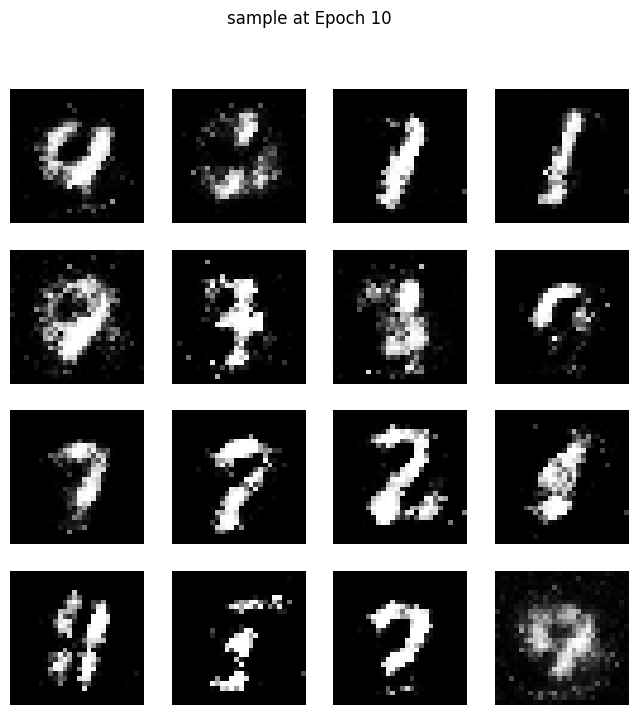

epoch:11|  D_loss:1.0095|  G_loss:1.5053
epoch:12|  D_loss:1.2015|  G_loss:1.2403
epoch:13|  D_loss:1.2449|  G_loss:1.6975
epoch:14|  D_loss:1.1919|  G_loss:1.2790
epoch:15|  D_loss:1.0243|  G_loss:1.3706
epoch:16|  D_loss:0.7552|  G_loss:1.4939
epoch:17|  D_loss:0.7839|  G_loss:1.4345
epoch:18|  D_loss:1.0217|  G_loss:1.5644
epoch:19|  D_loss:0.9257|  G_loss:1.3102
epoch:20|  D_loss:0.9804|  G_loss:1.6795
epoch:21|  D_loss:0.9221|  G_loss:1.6016
epoch:22|  D_loss:0.9454|  G_loss:1.4907
epoch:23|  D_loss:1.2438|  G_loss:1.2227
epoch:24|  D_loss:0.6959|  G_loss:1.5378
epoch:25|  D_loss:1.1590|  G_loss:1.2647
epoch:26|  D_loss:0.8225|  G_loss:1.4195
epoch:27|  D_loss:1.1579|  G_loss:1.2743
epoch:28|  D_loss:1.0351|  G_loss:1.1074
epoch:29|  D_loss:0.9993|  G_loss:1.4642
epoch:30|  D_loss:0.9676|  G_loss:1.2202
epoch:31|  D_loss:0.9607|  G_loss:1.5423
epoch:32|  D_loss:1.2723|  G_loss:1.2088
epoch:33|  D_loss:1.2554|  G_loss:0.9376
epoch:34|  D_loss:0.9668|  G_loss:1.2808
epoch:35|  D_los

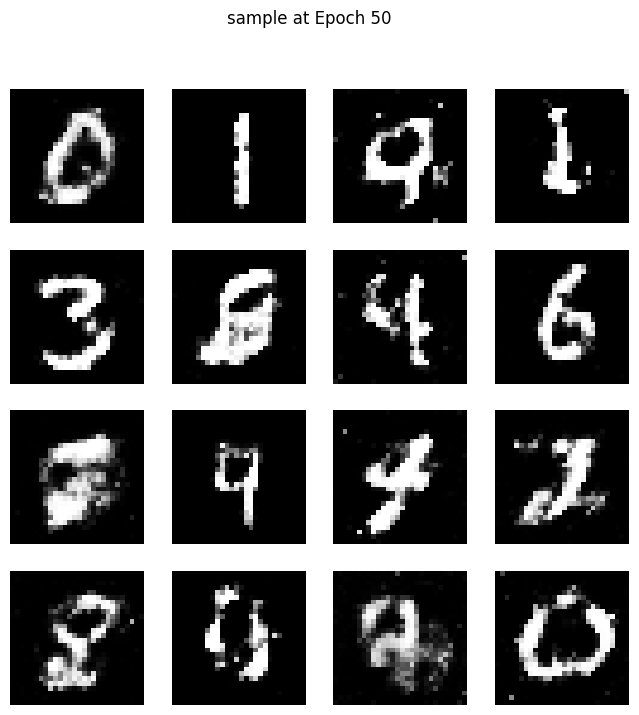

epoch:51|  D_loss:1.5692|  G_loss:1.0649
epoch:52|  D_loss:1.1720|  G_loss:1.0571
epoch:53|  D_loss:1.1062|  G_loss:1.1276
epoch:54|  D_loss:1.1242|  G_loss:0.9747
epoch:55|  D_loss:1.0327|  G_loss:1.1396
epoch:56|  D_loss:0.9175|  G_loss:1.0132
epoch:57|  D_loss:1.3741|  G_loss:1.0715
epoch:58|  D_loss:1.1390|  G_loss:0.9220
epoch:59|  D_loss:1.1203|  G_loss:1.1355
epoch:60|  D_loss:1.0640|  G_loss:1.1616
epoch:61|  D_loss:1.2429|  G_loss:1.1936
epoch:62|  D_loss:0.9998|  G_loss:1.1962
epoch:63|  D_loss:0.9801|  G_loss:1.0455
epoch:64|  D_loss:1.0271|  G_loss:1.0180
epoch:65|  D_loss:1.0290|  G_loss:1.3550
epoch:66|  D_loss:1.1144|  G_loss:1.0786
epoch:67|  D_loss:1.1507|  G_loss:1.1642
epoch:68|  D_loss:1.2109|  G_loss:1.0032
epoch:69|  D_loss:1.2173|  G_loss:1.4783
epoch:70|  D_loss:0.9115|  G_loss:1.2012
epoch:71|  D_loss:1.1081|  G_loss:1.1290
epoch:72|  D_loss:1.1602|  G_loss:1.2051
epoch:73|  D_loss:1.1490|  G_loss:1.0700
epoch:74|  D_loss:1.0791|  G_loss:0.9798
epoch:75|  D_los

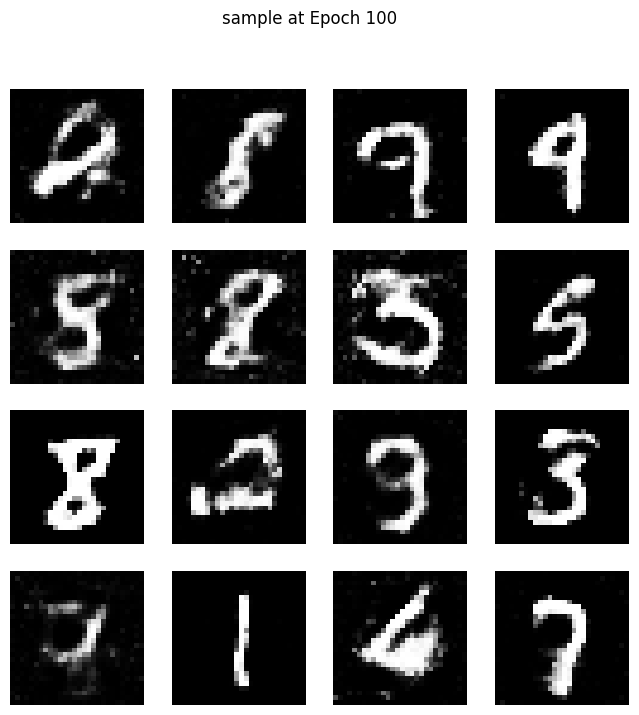

epoch:101|  D_loss:1.2321|  G_loss:1.1031
epoch:102|  D_loss:1.1927|  G_loss:1.3771
epoch:103|  D_loss:1.0721|  G_loss:1.0762
epoch:104|  D_loss:1.3271|  G_loss:1.2135


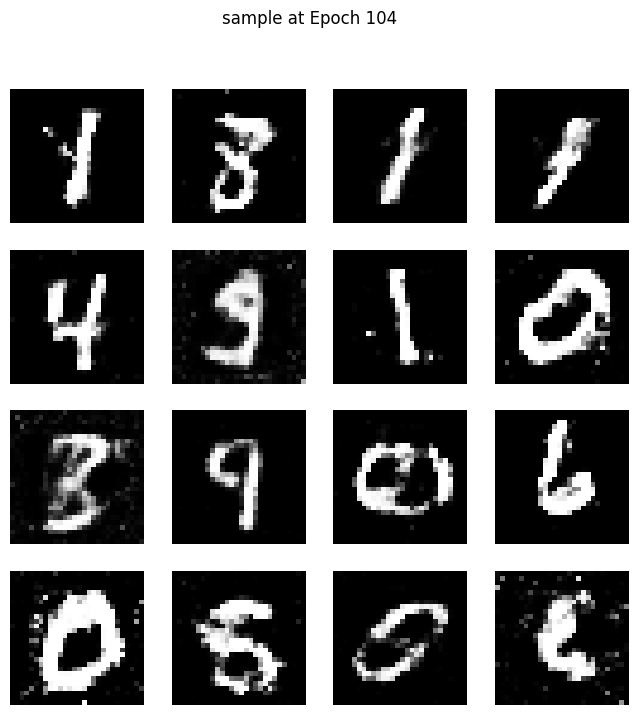

In [27]:
from math import e
G_losses=[]
D_losses=[]
for epoch in range(max_epoch):
  epoch_D_loss=0.0
  epoch_G_loss=0.0

  for i,(data,_) in enumerate(data_loader):
    #trainging dicriminator
    x=data.to(device)

    x_outputs=D(x)
    # Get the actual batch size
    current_batch_size = x.size(0)
    x=x.reshape(current_batch_size,-1).to(device)
    x_outputs=D(x)
    # Create D_labels and D_fakes with the current batch size
    D_labels=torch.ones([current_batch_size,1]).to(device)
    D_fakes=torch.zeros([current_batch_size,1]).to(device)
    D_x_loss=criterion(x_outputs,D_labels)

    z=torch.randn(current_batch_size,Z_size).to(device) # Use current_batch_size here as well
    z_outputs=D(G(z))
    D_z_loss=criterion(z_outputs,D_fakes)
    D_loss=D_x_loss+D_z_loss
    D.zero_grad()
    D_loss.backward()
    d_optimizer.step()
    epoch_D_loss+=D_loss.item()*x.size(0)


  #training the generator
    z=torch.randn(current_batch_size,Z_size).to(device) # Use current_batch_size here as well
    z_outputs=D(G(z))
    G_loss=criterion(z_outputs,D_labels)
    D.zero_grad()
    G.zero_grad()
    G_loss.backward()
    g_optimizer.step()
    epoch_G_loss+=G_loss.item()*x.size(0)

    #save the losses
  G_losses.append(epoch_G_loss/len(data_loader))
  D_losses.append(epoch_D_loss/len(data_loader))


  # Print the losses
  print('epoch:{}|  D_loss:{:.4f}|  G_loss:{:.4f}'.format(epoch,D_loss.item(),G_loss.item()))
  if epoch in [10,50,100]:
    img=get_sample_image(G,epoch,num_samples=16)
    

get_sample_image(G,epoch,num_samples=16)

## Generator and Discriminator Loss function

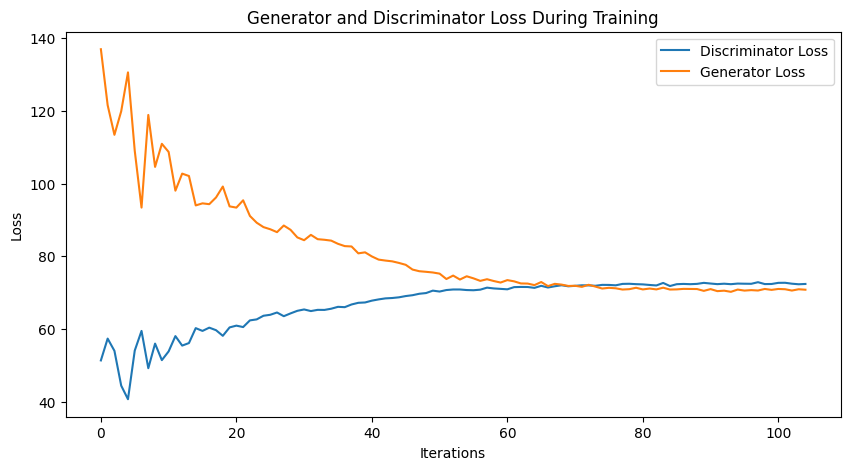

In [36]:

# Plot the losses
plt.figure(figsize=(10, 5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(D_losses, label="Discriminator Loss")
plt.plot(G_losses, label="Generator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.savefig('loss.png')
plt.show()

## Latent Space interpolation

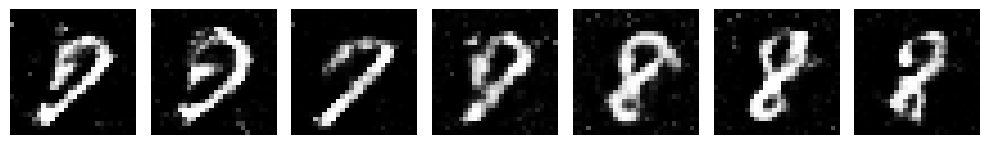

In [34]:
#latent space interpolation
z1=torch.randn(1,Z_size,1,1,device=device)
z2=torch.randn(1,Z_size,1,1,device=device)
z_interp = torch.zeros((7, Z_size))
z_interp[0, :] = z1.squeeze()
z_interp[1, :] = (z1*0.90 + z2*0.10).squeeze()
z_interp[2, :] = (z1*0.75 + z2*0.25).squeeze()
z_interp[3, :] = (z1*0.50 + z2*0.50).squeeze()
z_interp[4, :] = (z1*0.25 + z2*0.75).squeeze()
z_interp[5, :] = (z1*0.10 + z2*0.90).squeeze()
z_interp[6, :] = z2.squeeze()

z_interp= z_interp.to(device)

with torch.no_grad():
    fake_image_interp = G(z_interp).detach().cpu()
    fake_image_interp = fake_image_interp.view(7, 28, 28).cpu().detach()

fig, axs = plt.subplots(ncols = 7, figsize = (10, 5))
for i in range(7):
    axs[i].imshow(fake_image_interp[i], cmap = 'gray')
    axs[i].axis('off')

plt.tight_layout()
plt.savefig("GAN interpolated.png", dpi = 300)
plt.show()